In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Pre Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
MSFT = pd.read_csv('/content/drive/My Drive/ML/Dataset/MSFT.csv')

In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,141.316372,142.635957,139.943018,141.370437,138.390429,2.855832e+07
std,67.395704,68.054304,66.776362,67.463308,68.645192,1.284490e+07
min,56.700001,57.270000,56.320000,56.919998,52.664017,7.425600e+06
25%,86.325001,87.294998,85.500000,86.364998,82.243481,2.027515e+07
50%,119.500000,120.230003,118.580002,119.839996,116.641037,2.522750e+07
75%,200.709999,203.959999,198.375000,201.965004,199.646011,3.278815e+07
max,305.019989,305.839996,302.000000,305.220001,305.220001,1.112421e+08


In [ ]:
MSFT.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1254,2021-09-27,296.140015,296.470001,292.940002,294.170013,294.170013,23571700
1255,2021-09-28,289.799988,290.779999,282.750000,283.519989,283.519989,43186200
1256,2021-09-29,285.100006,286.769989,283.010010,284.000000,284.000000,26353700
1257,2021-09-30,285.709991,287.829987,281.619995,281.920013,281.920013,32325800
1258,2021-10-01,282.121704,289.980011,281.309998,289.100006,289.100006,27421895


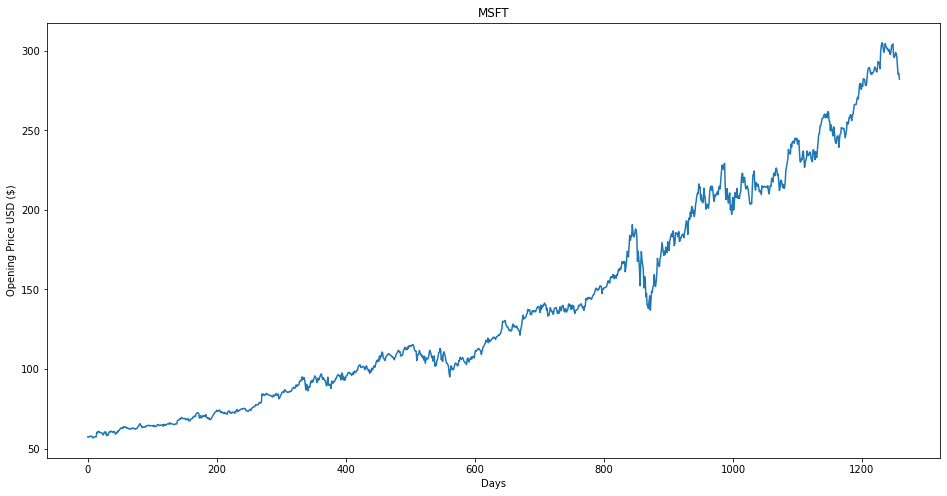

In [ ]:
plt.figure(figsize=(16,8))
plt.title('MSFT')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(MSFT['Open'])
plt.show()

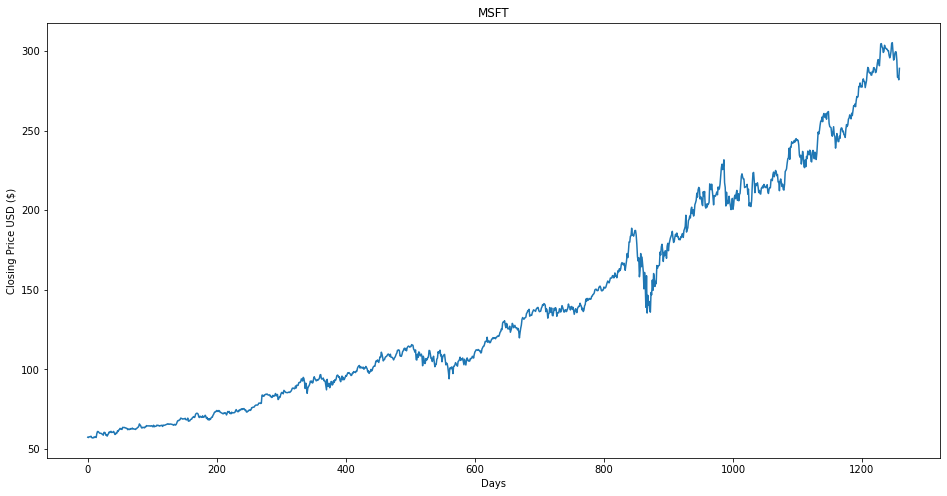

In [ ]:
plt.figure(figsize=(16,8))
plt.title('MSFT')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(MSFT['Close'])
plt.show()

#NEW

https://ieeexplore.ieee.org/abstract/document/8212716/authors#authors
https://ieeexplore.ieee.org/abstract/document/8212716/authors#authors

https://ieeexplore.ieee.org/abstract/document/9404733

In [ ]:
MSFT_new = MSFT.drop(['Adj Close', 'Volume'], axis =1)

In [ ]:
MSFT_new = MSFT_new.set_index(MSFT_new['Date'])
MSFT_new = MSFT_new.drop(['Date'], axis =1)

In [ ]:
MSFT_new

,Open,High,Low,Close
Date,,,,
2016-10-03,57.410000,57.549999,57.060001,57.419998
2016-10-04,57.270000,57.599998,56.970001,57.240002
2016-10-05,57.290001,57.959999,57.259998,57.639999
2016-10-06,57.740002,57.860001,57.279999,57.740002
2016-10-07,57.849998,57.980000,57.419998,57.799999
...,...,...,...,...
2021-09-27,296.140015,296.470001,292.940002,294.170013
2021-09-28,289.799988,290.779999,282.750000,283.519989
2021-09-29,285.100006,286.769989,283.010010,284.000000


#Trying to predict n days in future

In [ ]:
# n defines number of days in future which are to be forecasted
n = 10

In [ ]:
# actual = MSFT_new[['Close']][-n:] # Actual close value of last 5 days of Stocks
actual = MSFT_new[['Close']]
# index = np.arange(100)
# actual =actual.set_index(index)
# X = np.array(MSFT_close[['EMA_close']])
X_future = MSFT_new.drop(['Close'], axis =1)[-n:] # use this to predict 5 days in future
# X_future = MSFT_new.drop(['Close'], axis =1)
Y_actual = MSFT_new['Close'][-n:]
# Y_actual = MSFT_new['Close']
X = MSFT_new.drop(['Close'], axis=1)[:-n] # use this as X_train and test
y = MSFT_new['Close'][:-n] #use this as Y_train/test

In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) #cross validation
MAE_5= []
RMSE_5= []

In [ ]:
Y_actual.index[0]

'2021-09-20'

#Linear Regression

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
LR = LinearRegression() #initializing linear regression model
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))
# print("r2 score",r2_score(Y_test, y_pred))

Mean absolute error 0.6318468665579722
Mean squared error 1.131349759014507


In [ ]:
Y_future_LR = LR.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_LR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_LR)))
# print("r2 score",r2_score(Y_actual, Y_future))

#Linear Regression Using Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
# no. of base classifier
num_trees = 500
seed=8

# bagging classifier
LR_Bagging = BaggingRegressor(base_estimator = LR,
                          n_estimators = num_trees,
                          random_state = seed)
LR_Bagging.fit(X_train,Y_train)
y_pred = LR_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 0.6315913311594045
Mean squared error 1.1299001900784966


In [ ]:
Y_future_LR_Bagging = LR_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_LR_Bagging))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_LR_Bagging)))

#Ada Boost Linear Regression

In [ ]:
Ada_MAE =[]
Ada_RMSE =[]
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
ada_LR = AdaBoostRegressor(base_estimator=LR, learning_rate=0.01, loss = 'exponential')
ada_LR.fit(X_train,Y_train)
# y_pred = ada_LR.predict(X_test)
Y_future_ada_LR = ada_LR.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_LR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_LR)))

In [ ]:
Y_future_ada_LR = ada_LR.predict(X_future)
math.sqrt(mean_squared_error(Y_actual, Y_future_ada_LR))

1.274786481707374

#SVM

In [ ]:
from sklearn import svm
SV= svm.SVR()
SV.fit(X_train,Y_train)
y_pred = SV.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))
# print("r2 score",r2_score(Y_test, y_pred))


Mean absolute error 4.7432077416495755
Mean squared error 147.53889356831007


In [ ]:
Y_future_SV = SV.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_SV))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_SV)))

#SVM with Bagging

In [ ]:
 # bagging classifier
SVM_Bagging = BaggingRegressor(base_estimator = SV)
SVM_Bagging.fit(X_train,Y_train)
y_pred = SVM_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 4.763541154279585
Mean squared error 148.86566848618588


In [ ]:
Y_future_SVM = SVM_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_SVM))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_SVM)))

#SVM AdaBoost

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
SV= svm.SVR()
ada_SV = AdaBoostRegressor(base_estimator=SV, learning_rate=0.01, loss = 'exponential', n_estimators=800)
ada_SV.fit(X_train,Y_train)
Y_future_ada_SV = ada_SV.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_SV))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_SV)))

#DT Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth= 5)
DTR.fit(X_train,Y_train)
y_pred = DTR.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))
# print("r2 score",r2_score(Y_test, y_pred))

Mean absolute error 1.701965261926075
Mean squared error 5.659403764533578


In [ ]:
Y_future_DTR = DTR.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_DTR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_DTR)))

#DT Regressor with Bagging

In [ ]:
# bagging classifier
DTR_Bagging = BaggingRegressor(base_estimator = DTR)
DTR_Bagging.fit(X_train,Y_train)
y_pred = DTR_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 1.2866116060033164
Mean squared error 3.1257342236159973


In [ ]:
Y_future_DTR_Bagging = DTR_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_DTR_Bagging))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_DTR_Bagging)))

#DT Ada Boost

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth= 5)
ada_DTR = AdaBoostRegressor(base_estimator=DTR, learning_rate=0.01, loss = 'exponential')
ada_DTR.fit(X_train,Y_train)
Y_future_ada_DTR = ada_DTR.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_DTR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_DTR)))

# Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model
bayes_ridge = linear_model.BayesianRidge()
bayes_ridge.fit(X_train,Y_train)
Y_future_BRR= bayes_ridge.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_BRR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_BRR)))

#Bayesian Ridge Regression Bagging

In [ ]:
# bagging classifier
BRR_Bagging = BaggingRegressor(base_estimator = bayes_ridge)
BRR_Bagging.fit(X_train,Y_train)
y_pred = BRR_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 0.638037531628729
Mean squared error 1.1824815410074785


In [ ]:
Y_future_BRR_Bagging = BRR_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_BRR_Bagging))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_BRR_Bagging)))

#AdaBoost Bayesian Ridge Regression

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
bayes_ridge = linear_model.BayesianRidge()
ada_BRR = AdaBoostRegressor(base_estimator=bayes_ridge, learning_rate=0.01, loss = 'exponential')
ada_BRR.fit(X_train,Y_train)
Y_future_ada_BRR = ada_BRR.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_BRR ))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_BRR )))

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)
y_pred = KNN.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))
# print("r2 score",r2_score(Y_test, y_pred))

Mean absolute error 0.8456958031999977
Mean squared error 1.854893801688853


In [ ]:
Y_future_KNN = KNN.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_KNN))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_KNN)))

#KNN with Bagging

In [ ]:
# bagging classifier
KNN_Bagging = BaggingRegressor(base_estimator = KNN)
KNN_Bagging.fit(X_train,Y_train)
y_pred = KNN_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 0.8431766815199984
Mean squared error 1.7063965488865216


In [ ]:
Y_future_KNN_Bagging = KNN_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_KNN_Bagging))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_KNN_Bagging)))

#KNN Adaboost

In [ ]:
KNN = KNeighborsRegressor()
ada_KNN = AdaBoostRegressor(base_estimator=KNN, learning_rate=0.01, loss = 'exponential')
ada_KNN.fit(X_train,Y_train)
Y_future_ada_KNN = ada_KNN.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_KNN))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_KNN)))

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)
y_pred = RF.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))
# print("r2 score",r2_score(Y_test, y_pred))

Mean absolute error 0.7945457576000033
Mean squared error 1.7595335563308376


In [ ]:
Y_future_RF = RF.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_RF))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_RF)))

#Random Forest with Bagging

In [ ]:
# bagging classifier
Rf_Bagging = BaggingRegressor(base_estimator = RF)
Rf_Bagging.fit(X_train,Y_train)
y_pred = Rf_Bagging.predict(X_test)
print("Mean absolute error",mean_absolute_error(Y_test, y_pred))
print("Mean squared error",mean_squared_error(Y_test, y_pred))

Mean absolute error 0.8247515016199997
Mean squared error 1.7644716089647405


In [ ]:
Y_future_Rf_Bagging = Rf_Bagging.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual, Y_future_Rf_Bagging))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_Rf_Bagging)))

# Random Forest AdaBoost

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(max_depth=7)
ada_RF = AdaBoostRegressor(base_estimator=RF, learning_rate=0.01, loss = 'exponential')
ada_RF.fit(X_train,Y_train)
Y_future_ada_RF = ada_RF.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual, Y_future_ada_RF ))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual, Y_future_ada_RF)))

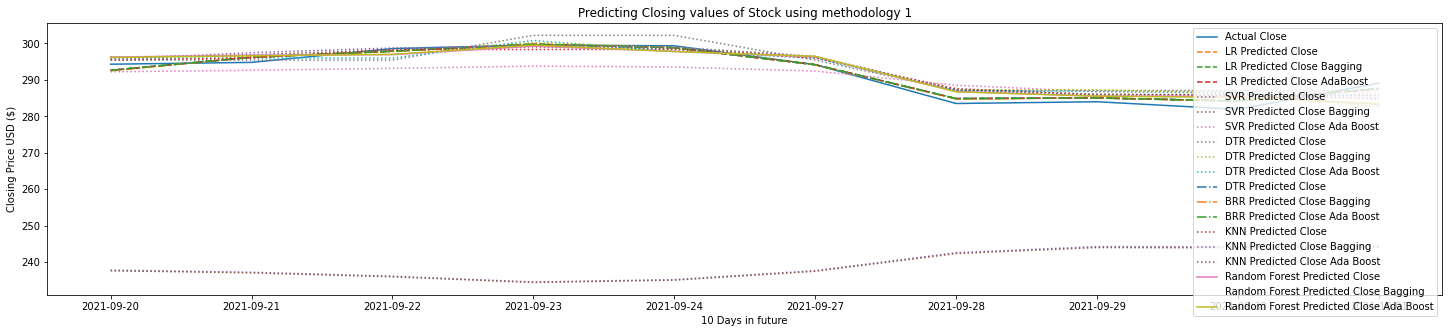

In [ ]:
plt.figure(figsize=(25,5))
plt.title('Predicting Closing values of Stock using methodology 1')
plt.xlabel('10 Days in future')
plt.ylabel('Closing Price USD ($)')
plt.plot(Y_actual, label= 'Actual Close')
plt.plot(Y_actual.index, Y_future_LR, label = 'LR Predicted Close',ls='--')
plt.plot(Y_actual.index, Y_future_LR_Bagging, label = 'LR Predicted Close Bagging',ls='--')
plt.plot(Y_actual.index, Y_future_ada_LR, label = 'LR Predicted Close AdaBoost',ls='--')
plt.plot(Y_actual.index, Y_future_SV, label = 'SVR Predicted Close',ls='dotted')
plt.plot(Y_actual.index, Y_future_SVM, label = 'SVR Predicted Close Bagging',ls='dotted')
plt.plot(Y_actual.index, Y_future_ada_SV, label = 'SVR Predicted Close Ada Boost',ls='dotted')
plt.plot(Y_actual.index, Y_future_DTR, label = 'DTR Predicted Close',ls=':')
plt.plot(Y_actual.index, Y_future_DTR_Bagging, label = 'DTR Predicted Close Bagging',ls=':')
plt.plot(Y_actual.index, Y_future_ada_DTR, label = 'DTR Predicted Close Ada Boost',ls=':')
plt.plot(Y_actual.index, Y_future_BRR, label = 'DTR Predicted Close',ls='-.')
plt.plot(Y_actual.index, Y_future_BRR_Bagging, label = 'BRR Predicted Close Bagging',ls='-.')
plt.plot(Y_actual.index, Y_future_ada_BRR, label = 'BRR Predicted Close Ada Boost',ls='-.')
plt.plot(Y_actual.index, Y_future_KNN, label = 'KNN Predicted Close',ls='dotted')
plt.plot(Y_actual.index, Y_future_KNN_Bagging, label = 'KNN Predicted Close Bagging',ls='dotted')
plt.plot(Y_actual.index, Y_future_ada_KNN, label = 'KNN Predicted Close Ada Boost',ls='dotted')
plt.plot(Y_actual.index, Y_future_RF, label = 'Random Forest Predicted Close',ls='-')
plt.plot(Y_actual.index, Y_future_Rf_Bagging, label = 'Random Forest Predicted Close Bagging',ls='')
plt.plot(Y_actual.index, Y_future_ada_RF, label = 'Random Forest Predicted Close Ada Boost',ls='-')
plt.legend()
plt.show()

In [ ]:
Table_1 = pd.DataFrame()
Algorithm = ['Linear Regression', 'Linear Regression Bagging','Linear Regression Ada Boost' ,'Support Vector Regression','Support Vector Regression Bagging','Support Vector Machine Adaboost' , 'Decision Tree Regression','Decision Tree Regression Bagging','Decision Tree Adaboost','Bayesian Ridge Regression','BRR with Bagging','Ada boost BRR','KNN','KNN Bagging','KNN Ada Boost','Random Forest','Random Forest with Bagging','Random Forest Ada Boost']
Table_1['Algorithm'] = pd.Series(Algorithm)
Table_1['MAE']= pd.Series(MAE_5)
Table_1['RMSE'] = pd.Series(RMSE_5)
#'Linear-SVR', 'Linear-Linear', 'Linear-DTR']

In [ ]:
Table_1

,Algorithm,MAE,RMSE
0,Linear Regression,1.063081,1.253882
1,Linear Regression Bagging,1.062837,1.253894
2,Linear Regression Ada Boost,1.079758,1.274786
3,Support Vector Regression,52.536876,53.502907
4,Support Vector Regression Bagging,52.725477,53.678954
5,Support Vector Machine Adaboost,3.847559,4.164768
6,Decision Tree Regression,2.551712,2.852557
7,Decision Tree Regression Bagging,2.563249,3.146429
8,Decision Tree Adaboost,2.434119,2.665010
9,Bayesian Ridge Regression,1.063885,1.255083


In [ ]:
Table_1.to_csv('/content/drive/MyDrive/ML project/Naive-20.csv')

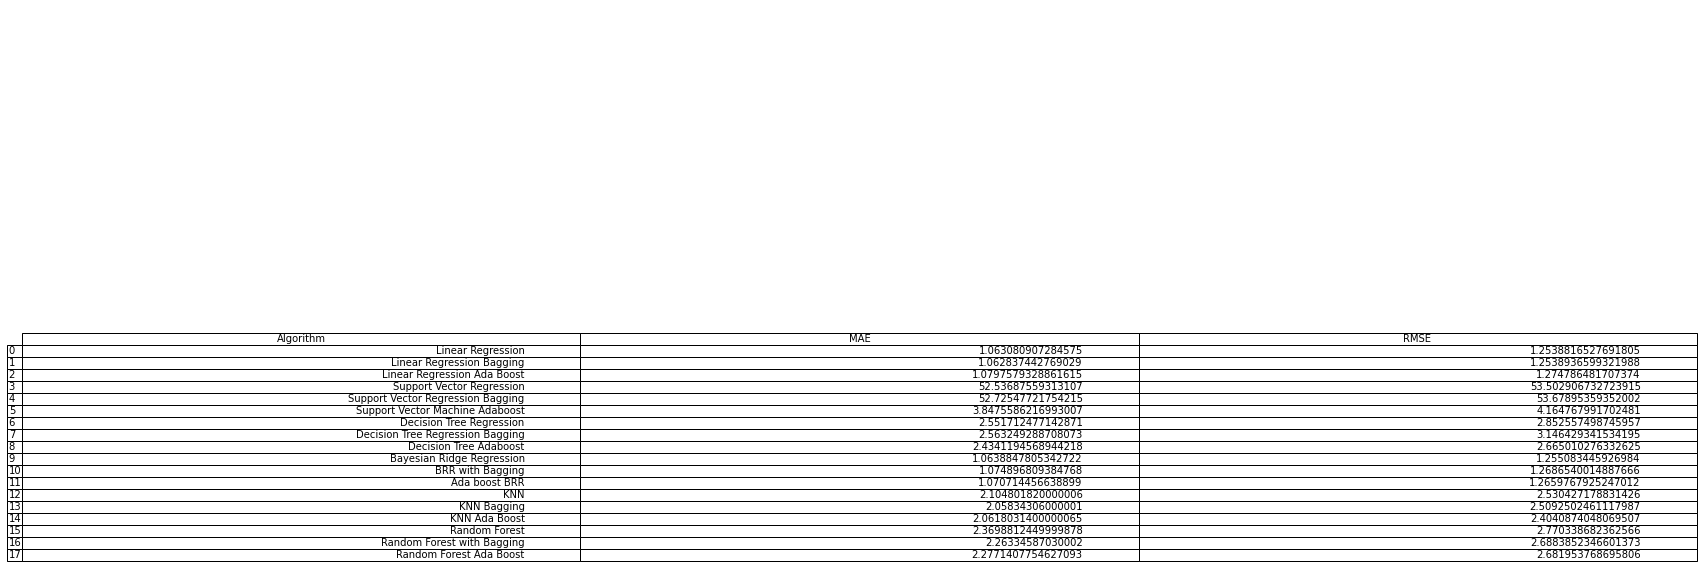

In [ ]:
from pandas.plotting import table
ax = plt.figure(figsize=(30,6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, Table_1)


Springer paper
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00333-6

In [ ]:
MSFT_copy = MSFT.copy()
MSFT_copy['EMA_close'] = MSFT_copy['Close'].ewm(span = 10, adjust = False).mean()
MSFT_copy = MSFT_copy.drop(['Adj Close','Volume'], axis =1)

In [ ]:
MSFT_copy['SMA_10 Close'] = MSFT_copy['Close'].rolling(window=10).mean()
MSFT_copy = MSFT_copy[10:]


In [ ]:
MSFT_copy

,Date,Open,High,Low,Close,EMA_close,SMA_10 Close
10,2016-10-17,57.360001,57.459999,56.869999,57.220001,57.352162,57.432000
11,2016-10-18,57.529999,57.950001,57.410000,57.660000,57.408132,57.474000
12,2016-10-19,57.470001,57.840000,57.400002,57.529999,57.430290,57.463000
13,2016-10-20,57.500000,57.520000,56.660000,57.250000,57.397510,57.414000
14,2016-10-21,60.279999,60.450001,59.490002,59.660000,57.808872,57.600000
...,...,...,...,...,...,...,...
1254,2021-09-27,296.140015,296.470001,292.940002,294.170013,298.065589,299.045999
1255,2021-09-28,289.799988,290.779999,282.750000,283.519989,295.420935,297.418997
1256,2021-09-29,285.100006,286.769989,283.010010,284.000000,293.344401,295.336996
1257,2021-09-30,285.709991,287.829987,281.619995,281.920013,291.267240,293.006998


In [ ]:
MSFT_copy = MSFT_copy.set_index(np.arange(MSFT_copy.shape[0]))


In [ ]:
n=20
Y_actual_Close = MSFT_copy[['Close']][-n:]
MSFT_copy['New Date']= MSFT_copy['Date']
Y_actual_Close = Y_actual_Close.set_index(MSFT_copy['New Date'][-n:])

# Y_actual = MSFT_copy[['Close']][-n:]
# Y_actual = Y_actual.set_index(MSFT_copy['New Date'][-n:])


In [ ]:
Y_actual_Close.index[0]

'2021-09-20'

In [ ]:
#n represents no of days in future for which we are predicting
# n = 3

MSFT_copy['Date'] = pd.to_datetime(MSFT_copy['Date'])
MSFT_copy['Day'] = MSFT_copy['Date'].dt.day
MSFT_copy['Month'] = MSFT_copy['Date'].dt.month
MSFT_copy['Year'] = MSFT_copy['Date'].dt.year
MSFT_copy['Day of week']= MSFT_copy['Date'].dt.dayofweek
MSFT_copy['Day of year']= MSFT_copy['Date'].dt.dayofyear
MSFT_copy['Is month start']= MSFT_copy['Date'].dt.is_month_start
MSFT_copy['Is month end']= MSFT_copy['Date'].dt.is_month_end
MSFT_copy['Quarter'] = MSFT_copy['Date'].dt.quarter
MSFT_copy['Is Quarter start']= MSFT_copy['Date'].dt.is_quarter_start
MSFT_copy['Is Quarter end']= MSFT_copy['Date'].dt.is_quarter_end
MSFT_copy['Is year start']= MSFT_copy['Date'].dt.is_year_start
MSFT_copy['Is year end']= MSFT_copy['Date'].dt.is_year_end

#use this for predicting n days in future
X_future= MSFT_copy.drop(['Date', 'EMA_close', 'Open', 'High', 'Low', 'Close', 'SMA_10 Close', 'New Date'], axis =1)[-n:]
Y_actual = MSFT_copy['EMA_close'][-n:]
# Y_actual = Y_actual.set_index(MSFT_copy['New Date'][-n:])
Y_actual_SMA= MSFT_copy['SMA_10 Close'][-n:]
# Y_actual_SMA = Y_actual_SMA.set_index(MSFT_copy['New Date'][-n:])




# # use this as X_train and test
# X= MSFT_copy['Date'][:-n]
X= MSFT_copy.drop(['Date', 'EMA_close', 'Open', 'High', 'Low', 'Close', 'SMA_10 Close', 'New Date'], axis =1)[:-n]
y = MSFT_copy['EMA_close'][:-n] #use this as Y_train/test
y_SMA = MSFT_copy['SMA_10 Close'][:-n]
y_close = MSFT['Close'][:-n]

#Reshaping as X has only one feature
# X = np.array(X)
# X = X.reshape(-1,1)
# X_future = np.array(X_future)
# X_future = X_future.reshape(-1,1)
#splitting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) #cross validation
X_train_SMA, X_test_SMA, Y_train_SMA, Y_test_SMA = train_test_split(X, y_SMA, test_size=0.2, random_state=0) #cross validation
X_train_close, X_test_close, Y_train_close, Y_test_close = train_test_split(X, y_SMA, test_size=0.2, random_state=0)

In [ ]:
X_train_SMA

,Day,Month,Year,Day of week,Day of year,Is month start,Is month end,Quarter,Is Quarter start,Is Quarter end,Is year start,Is year end
1190,12,7,2021,0,193,False,False,3,False,False,False,False
567,18,1,2019,4,18,False,False,1,False,False,False,False
787,3,12,2019,1,337,False,False,4,False,False,False,False
406,30,5,2018,2,150,False,False,2,False,False,False,False
985,16,9,2020,2,260,False,False,3,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
763,29,10,2019,1,302,False,False,4,False,False,False,False
835,12,2,2020,2,43,False,False,1,False,False,False,False
1216,17,8,2021,1,229,False,False,3,False,False,False,False
559,8,1,2019,1,8,False,False,1,False,False,False,False


In [ ]:
X_train_close

,Day,Month,Year,Day of week,Day of year,Is month start,Is month end,Quarter,Is Quarter start,Is Quarter end,Is year start,Is year end
1190,12,7,2021,0,193,False,False,3,False,False,False,False
567,18,1,2019,4,18,False,False,1,False,False,False,False
787,3,12,2019,1,337,False,False,4,False,False,False,False
406,30,5,2018,2,150,False,False,2,False,False,False,False
985,16,9,2020,2,260,False,False,3,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
763,29,10,2019,1,302,False,False,4,False,False,False,False
835,12,2,2020,2,43,False,False,1,False,False,False,False
1216,17,8,2021,1,229,False,False,3,False,False,False,False
559,8,1,2019,1,8,False,False,1,False,False,False,False


#Prediction for SMA and values for stage 1

In [ ]:
#Prediction for SMA and EMA values --STAGE 1
from sklearn.linear_model import LinearRegression
learner = LinearRegression() #initializing linear regression model
learner.fit(X_train,Y_train)
Y_future = learner.predict(X_future)

from sklearn.linear_model import LinearRegression
LR_SMA = LinearRegression() #initializing linear regression model
LR_SMA.fit(X_train_SMA,Y_train_SMA)
Y_future_SMA = LR_SMA.predict(X_future)

#One Stage Framework

In [ ]:
#Prediction for One Stage framework
MAE_5=[]
RMSE_5=[]
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
LR_close = LinearRegression() #initializing linear regression model
LR_close.fit(X_train_close,Y_train_close)
Y_future_LR_close = LR_close.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_LR_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_LR_close)))

from sklearn import svm
rbf_SVR_close= svm.SVR(kernel = 'rbf', C= 3000.0, gamma= 0.3)
rbf_SVR_close.fit(X_train_close,Y_train_close)
Y_future_SV_close = rbf_SVR_close.predict(X_future)

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_SV_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_SV_close)))

from sklearn.tree import DecisionTreeRegressor
DTR_close= DecisionTreeRegressor(max_depth= 5)
DTR_close.fit(X_train_close,Y_train_close)
Y_future_DTR_close = DTR_close.predict(X_future)

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_DTR_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_DTR_close)))

from sklearn import linear_model
bayes_ridge_close = linear_model.BayesianRidge()
bayes_ridge_close.fit(X_train_close,Y_train_close)
Y_future_BRR_close= bayes_ridge_close.predict(X_future)
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_BRR_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_BRR_close)))


from sklearn.neighbors import KNeighborsRegressor
KNN_close= KNeighborsRegressor()
KNN_close.fit(X_train_close,Y_train_close)
Y_future_KNN_close = KNN_close.predict(X_future)

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_KNN_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_KNN_close)))


from sklearn.ensemble import RandomForestRegressor
RF_close= RandomForestRegressor()
RF_close.fit(X_train_close,Y_train_close)
Y_future_RF_close = RF_close.predict(X_future)

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_RF_close))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_RF_close)))



#Bagging With One stage Framework

In [ ]:
LR_Bag = BaggingRegressor(base_estimator = LR_close)
LR_Bag.fit(X_train_close,Y_train_close)
y_pred = LR_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual_Close, y_pred))

Mean absolute error 41.77919017451303
Mean squared error 1791.2086385951873


In [ ]:
Y_future_LR_Bag = LR_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_LR_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_LR_Bag)))

In [ ]:
# bagging classifier
SVM_Bag = BaggingRegressor(base_estimator = SV)
SVM_Bag.fit(X_train_close,Y_train_close)
y_pred = SVM_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual_Close, y_pred))

Mean absolute error 174.1493130945224
Mean squared error 30369.88425242796


In [ ]:
Y_future_SVM_Bag = SVM_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_SVM_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_SVM_Bag)))

In [ ]:
# bagging classifier
DTR_Bag = BaggingRegressor(base_estimator = DTR)
DTR_Bag.fit(X_train_close,Y_train_close)
y_pred = DTR_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual_Close, y_pred))

Mean absolute error 8.063288937590494
Mean squared error 106.83551938116702


In [ ]:
Y_future_DTR_Bag = DTR_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_DTR_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_DTR_Bag)))

In [ ]:
# bagging classifier
KNN_Bag = BaggingRegressor(base_estimator = KNN)
KNN_Bag.fit(X_train_close,Y_train_close)
y_pred = KNN_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual_Close, y_pred))

Mean absolute error 124.70605645500022
Mean squared error 15616.353399737098


In [ ]:
Y_future_KNN_Bag = KNN_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_KNN_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_KNN_Bag)))

In [ ]:
# bagging classifier
Rf_Bag = BaggingRegressor(base_estimator = RF)
Rf_Bag.fit(X_train_close,Y_train_close)
y_pred = Rf_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual, y_pred))

Mean absolute error 8.034088606663556
Mean squared error 25.23919056349604


In [ ]:
Y_future_Rf_Bag = Rf_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_Rf_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_Rf_Bag)))

In [ ]:
# bagging classifier
BRR_Bag = BaggingRegressor(base_estimator = bayes_ridge)
BRR_Bag.fit(X_train_close,Y_train_close)
y_pred = BRR_Bag.predict(X_future)
print("Mean absolute error",mean_absolute_error(Y_actual_Close, y_pred))
print("Mean squared error",mean_squared_error(Y_actual, y_pred))

Mean absolute error 39.911131570214465
Mean squared error 1976.6680842054525


In [ ]:
Y_future_BRR_Bag = BRR_Bag.predict(X_future)
import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_BRR_Bag))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_BRR_Bag)))

#One stage Framework for Ada Boost

## Linear Regression

In [ ]:
#LR
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
LR_close = LinearRegression()
ada_one_LR = AdaBoostRegressor(base_estimator=LR_close)
ada_one_LR.fit(X_train_close,Y_train_close)
# y_pred = ada_LR.predict(X_test)
Y_future_ada_one_LR = ada_one_LR.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_LR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_LR)))

##SVR

In [ ]:
#SVR
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
SV_close= svm.SVR(kernel = 'rbf', C= 3000.0, gamma= 0.001)
ada_one_SV = AdaBoostRegressor(base_estimator=SV_close)
ada_one_SV.fit(X_train_close,Y_train_close)
Y_future_ada_one_SV = ada_one_SV.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_SV))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_SV)))

##DTR

In [ ]:
#DTR
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
DTR_close = DecisionTreeRegressor(max_depth= 5)
ada_one_DTR = AdaBoostRegressor(base_estimator=DTR_close)
ada_one_DTR.fit(X_train_close,Y_train_close)
Y_future_ada_one_DTR = ada_one_DTR.predict(X_future)
MAE_5.append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_DTR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_DTR)))

##Bayesian Ridge Regression

In [ ]:
#Baye's Ridge Regression
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
bayes_ridge_close = linear_model.BayesianRidge()
ada_one_BRR = AdaBoostRegressor(base_estimator=bayes_ridge_close)
ada_one_BRR.fit(X_train_close,Y_train_close)
Y_future_ada_one_BRR= ada_one_BRR.predict(X_future)
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_BRR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_BRR)))

##Random Forest

In [ ]:
#Random Forest
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
RF_close= RandomForestRegressor(max_depth=5)
ada_one_RF = AdaBoostRegressor(base_estimator=RF_close)
ada_one_RF.fit(X_train_close,Y_train_close)
Y_future_ada_one_RF= ada_one_RF.predict(X_future)
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_RF))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_RF)))

##KNN

In [ ]:
#Random Forest
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
KNN_close= KNeighborsRegressor()
ada_one_KNN = AdaBoostRegressor(base_estimator=KNN_close)
ada_one_KNN.fit(X_train_close,Y_train_close)
Y_future_ada_one_KNN= ada_one_KNN.predict(X_future)
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_future_ada_one_KNN))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_future_ada_one_KNN)))

#Two Stage Approch

In [ ]:
# creating Xtrain/test which is (t+nth) days EMA and SMA predicted
X= pd.DataFrame()
X['EMA_close']= MSFT_copy['EMA_close'][:-n]
X['SMA_10 Close']= MSFT_copy['SMA_10 Close'][:-n]

### predicted features for (t+nth) days
X_lately = pd.DataFrame()
X_lately['EMA_close'] = Y_future
X_lately['SMA_10 Close'] = Y_future_SMA

y = MSFT_copy['Close'][:-n]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) #cross validation
#Linear -Linear
from sklearn.linear_model import LinearRegression
learner = LinearRegression() #initializing linear regression model
learner.fit(X_train,Y_train)
Y_lately_LR = learner.predict(X_lately)

#Linear-SVR
from sklearn import svm
rbf_SVR= svm.SVR(kernel = 'rbf', C= 3000.0, gamma= 0.3)
rbf_SVR.fit(X_train,Y_train)
Y_lately_SV = rbf_SVR.predict(X_lately)

#Linear-DTR
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth= 5)
DTR.fit(X_train,Y_train)
Y_lately_DTR = DTR.predict(X_lately)
########################


#Linear-KNN
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
LR_KNN= KNN
LR_KNN.fit(X_train,Y_train)
Y_lately_LR_KNN = LR_KNN.predict(X_lately)


#Linear-Random Forest
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
LR_RF=RF
LR_RF.fit(X_train,Y_train)
Y_lately_LR_RF = LR_RF.predict(X_lately)




#Linear-Bayesian Ridge
from sklearn import linear_model
BRR=linear_model.BayesianRidge()
LR_BRR=BRR
LR_BRR.fit(X_train,Y_train)
Y_lately_LR_BRR = LR_BRR.predict(X_lately)



import math
MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_SV))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_SV)))

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_LR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_LR)))

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_DTR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_DTR)))

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_LR_KNN))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_LR_KNN)))

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_LR_RF))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_LR_RF)))

MAE_5 .append(mean_absolute_error(Y_actual_Close, Y_lately_LR_BRR))
RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, Y_lately_LR_BRR)))


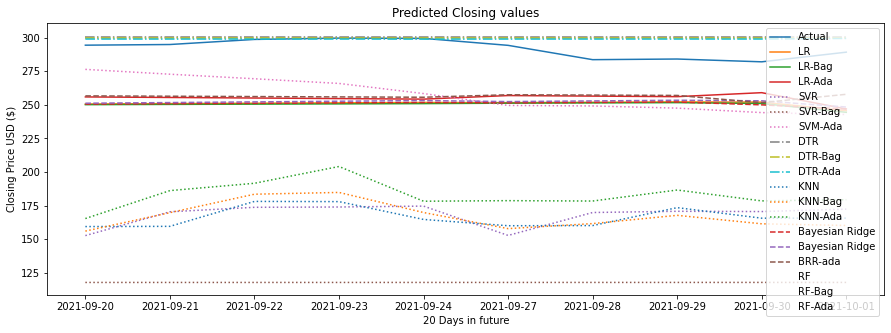

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Predicted Closing values')
plt.plot( Y_actual_Close.index, Y_actual_Close, label= 'Actual')
plt.xlabel('20 Days in future')
plt.ylabel('Closing Price USD ($)')
plt.plot(Y_actual_Close.index, Y_future_LR_close, label = 'LR',ls='-')
plt.plot(Y_actual_Close.index, Y_future_LR_Bag, label = 'LR-Bag',ls='-')
plt.plot(Y_actual_Close.index, Y_future_ada_one_LR, label = 'LR-Ada',ls='-')
plt.plot(Y_actual_Close.index, Y_future_SV_close, label = 'SVR',ls=':')
plt.plot(Y_actual_Close.index, Y_future_SVM_Bag, label = 'SVR-Bag',ls=':')
plt.plot(Y_actual_Close.index, Y_future_ada_one_SV, label = 'SVM-Ada',ls=':')
plt.plot(Y_actual_Close.index, Y_future_DTR_close, label = 'DTR',ls='-.')
plt.plot(Y_actual_Close.index, Y_future_DTR_Bag, label = 'DTR-Bag',ls='-.')
plt.plot(Y_actual_Close.index, Y_future_ada_one_DTR, label = 'DTR-Ada',ls='-.')
plt.plot(Y_actual_Close.index, Y_future_KNN_close, label = 'KNN',ls='dotted')
plt.plot(Y_actual_Close.index, Y_future_KNN_Bag, label = 'KNN-Bag',ls='dotted')
plt.plot(Y_actual_Close.index, Y_future_ada_one_KNN, label = 'KNN-Ada',ls='dotted')
plt.plot(Y_actual_Close.index, Y_future_BRR_close, label = 'Bayesian Ridge',ls='--')
plt.plot(Y_actual_Close.index, Y_future_BRR_Bag, label = 'Bayesian Ridge',ls='--')
plt.plot(Y_actual_Close.index, Y_future_ada_one_BRR, label = 'BRR-ada',ls='--')
plt.plot(Y_actual_Close.index, Y_future_RF_close, label = 'RF',ls=' ')
plt.plot(Y_actual_Close.index, Y_future_Rf_Bag, label = 'RF-Bag',ls=' ')
plt.plot(Y_actual_Close.index, Y_future_ada_one_RF, label = 'RF-Ada',ls=' ')

plt.legend(loc='upper right')
plt.show()

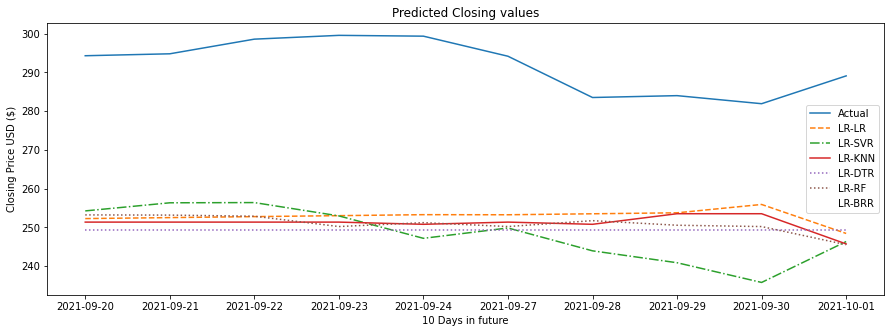

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Predicted Closing values')
plt.plot( Y_actual_Close.index, Y_actual_Close, label= 'Actual')
plt.xlabel('10 Days in future')
plt.ylabel('Closing Price USD ($)')
plt.plot(Y_actual_Close.index, Y_lately_LR, label = 'LR-LR',ls='--')
plt.plot(Y_actual_Close.index, Y_lately_SV, label = 'LR-SVR',ls='-.')
plt.plot(Y_actual_Close.index, Y_lately_LR_KNN, label = 'LR-KNN',ls='-')
plt.plot(Y_actual_Close.index, Y_lately_DTR, label = 'LR-DTR',ls='dotted')
plt.plot(Y_actual_Close.index, Y_lately_LR_RF, label = 'LR-RF',ls=':')
plt.plot(Y_actual_Close.index, Y_lately_LR_BRR, label = 'LR-BRR',ls='')
plt.legend()
plt.show()

In [ ]:
Table_1 = pd.DataFrame()
Algorithm = ['Linear Regression', 'Support Vector Regression', 'Decision Tree Regression','Bayesian Ridge Regression','KNN','RF','LR_Bag','SVM_Bag','DTR_Bag','KNN_Bag','RF_Bag','Linear AdaBoost','SVR Adaboost','DTR adaboost','BRR Adaboost',"RF Adaboost",'KNN Adaboost','Linear-Linear','Linear-KNN','Linear-RF','Linear- Bayesian']
Table_1['Algorithm'] = pd.Series(Algorithm)
Table_1['MAE']= pd.Series(MAE_5)
Table_1['RMSE'] = pd.Series(RMSE_5)

In [ ]:
Table_1

,Algorithm,MAE,RMSE
0,Linear Regression,41.084545,41.633506
1,Support Vector Regression,123.811147,124.234966
2,Decision Tree Regression,8.211799,10.452394
3,Bayesian Ridge Regression,41.247537,41.740616
4,KNN,125.517338,125.796089
5,RF,8.198145,10.501902
6,LR_Bag,41.779190,42.322673
7,SVM_Bag,174.149313,174.269574
8,DTR_Bag,8.063289,10.336127
9,KNN_Bag,124.706056,124.965409


#Two Stage Approach with Adaboost

Stage 1 Adaboost-LR

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
ada_learner = LinearRegression()
# from sklearn.tree import DecisionTreeRegressor
# ada_learner = DecisionTreeRegressor(max_depth= 5)
ada_learner_LR = AdaBoostRegressor(base_estimator=ada_learner)
ada_learner_LR.fit(X_train,Y_train)
ada_Y_future = ada_learner_LR.predict(X_future)

ada_learner_SMA = LinearRegression()
ada_learner_LR_SMA = AdaBoostRegressor(base_estimator=ada_learner_SMA)
ada_learner_LR_SMA.fit(X_train,Y_train)
ada_Y_future_SMA = ada_learner_LR_SMA.predict(X_future)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Day
- Day of week
- Day of year
- Is Quarter end
- Is Quarter start
- ...
Feature names seen at fit time, yet now missing:
- EMA_close
- SMA_10 Close

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
Ada_MAE_5= []
Ada_RMSE_5 = []
from sklearn.metrics import mean_squared_error, mean_absolute_error
# creating Xtrain/test which is (t+nth) days EMA and SMA predicted
X= pd.DataFrame()
X['EMA_close']= MSFT_copy['EMA_close'][:-n]
X['SMA_10 Close']= MSFT_copy['SMA_10 Close'][:-n]

### predicted features for (t+nth) days
X_lately = pd.DataFrame()
X_lately['EMA_close'] = ada_Y_future
X_lately['SMA_10 Close'] = ada_Y_future_SMA

y = MSFT_copy['Close'][:-n]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) #cross validation
#Linear -Linear
from sklearn.linear_model import LinearRegression
learner = LinearRegression() #initializing linear regression model
learner.fit(X_train,Y_train)
ada_Y_lately_LR = learner.predict(X_lately)

#Linear-SVR
from sklearn import svm
rbf_SVR= svm.SVR(kernel = 'rbf', C= 3000.0, gamma= 0.01)
rbf_SVR.fit(X_train,Y_train)
ada_Y_lately_SV = rbf_SVR.predict(X_lately)

#Linear-DTR
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth= 5)
DTR.fit(X_train,Y_train)
ada_Y_lately_DTR = DTR.predict(X_lately)

#Linear-BRR
from sklearn import linear_model
BRR = linear_model.BayesianRidge()
BRR.fit(X_train,Y_train)
ada_Y_lately_BRR= BRR.predict(X_lately)

#Linear-RF
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(max_depth=5)
RF.fit(X_train,Y_train)
ada_Y_lately_RF= bayes_ridge.predict(X_lately)

import math
Ada_MAE_5 .append(mean_absolute_error(Y_actual_Close, ada_Y_lately_SV))
Ada_RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, ada_Y_lately_SV)))

Ada_MAE_5 .append(mean_absolute_error(Y_actual_Close, ada_Y_lately_LR))
Ada_RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, ada_Y_lately_LR)))

Ada_MAE_5 .append(mean_absolute_error(Y_actual_Close, ada_Y_lately_DTR))
Ada_RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, ada_Y_lately_DTR)))

Ada_MAE_5 .append(mean_absolute_error(Y_actual_Close, ada_Y_lately_BRR))
Ada_RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, ada_Y_lately_BRR)))

Ada_MAE_5 .append(mean_absolute_error(Y_actual_Close, ada_Y_lately_RF))
Ada_RMSE_5.append(math.sqrt(mean_squared_error(Y_actual_Close, ada_Y_lately_RF)))


In [ ]:
Table_1 = pd.DataFrame()
Algorithm = ['Adaboost Linear-Linear','Adaboost-Linear-KNN','Adaboost-Linear- Bayesian','Adaboost-Linear-RF']
Table_1['Algorithm'] = pd.Series(Algorithm)
Table_1['MAE']= pd.Series(MAE_5)
Table_1['RMSE'] = pd.Series(RMSE_5)